In [1]:
r1="""-L|F7
7S-7|
L|7||
-L-J|
L|-JF""".split('\n')


r2="""7-F7-
.FJ|7
SJLL7
|F--J
LJ.LJ""".split('\n')

"""
| is a vertical pipe connecting north and south.
- is a horizontal pipe connecting east and west.
L is a 90-degree bend connecting north and east.
J is a 90-degree bend connecting north and west.
7 is a 90-degree bend connecting south and west.
F is a 90-degree bend connecting south and east.
. is ground; there is no pipe in this tile.
"""



dir={'|':[(0,1),(0,-1)],
   '-':[(1,0),(-1,0)],
   'L':[(1,0),(0,-1)],
   'J':[(-1,0),(0,-1)],
   '7':[(-1,0),(0,1)],
   'F':[(1,0),(0,1)],
   'S':[(1,0),(0,1),(-1,0),(0,-1)],
   '.':[(0,0)]}



r=open('day10_inp.txt','r').read()
r=r.split('\n')
r=r2
from collections import deque

grid = r

for y, row in enumerate(grid):
    for x, ch in enumerate(row):
        if ch == "S":
            sx = x
            sy = y
            break
    else:
        continue
    break
print(sx,sy)
visited={(sx,sy):0}
q=deque([(sx,sy,0)])
rows=len(grid)
columns=len(grid[0])
mdist=0
while q:
    x, y, dist = q.popleft()
    ch = grid[y][x]
    if ch=='.':
        print('punt')
    visited[(x,y)]=dist
    mdist=max(mdist,dist)
    #print(x,y,dist,ch)
    for d in dir[ch]:
        xn,yn=(x+d[0],y+d[1])
        if (xn,yn) not in visited and xn>=0 and xn<columns and yn>=0 and yn<rows:
            q.append((xn,yn,dist+1))
print(mdist)
print(len(visited))

0 2
punt
8
17


In [7]:
r1="""-L|F7
7S-7|
L|7||
-L-J|
L|-JF""".split('\n')


r2="""7-F7-
.FJ|7
SJLL7
|F--J
LJ.LJ""".split('\n')


r3=""".F----7F7F7F7F-7....
.|F--7||||||||FJ....
.||.FJ||||||||L7....
FJL7L7LJLJ||LJ.L-7..
L--J.L7...LJS7F-7L7.
....F-J..F7FJ|L7L7L7
....L7.F7||L7|.L7L7|
.....|FJLJ|FJ|F7|.LJ
....FJL-7.||.||||...
....L---J.LJ.LJLJ...""".split('\n')


r4="""FF7FSF7F7F7F7F7F---7
L|LJ||||||||||||F--J
FL-7LJLJ||||||LJL-77
F--JF--7||LJLJIF7FJ-
L---JF-JLJIIIIFJLJJ7
|F|F-JF---7IIIL7L|7|
|FFJF7L7F-JF7IIL---7
7-L-JL7||F7|L7F-7F7|
L.L7LFJ|||||FJL7||LJ
L7JLJL-JLJLJL--JLJ.L""".split('\n')

"""
| is a vertical pipe connecting north and south.
- is a horizontal pipe connecting east and west.
L is a 90-degree bend connecting north and east.
J is a 90-degree bend connecting north and west.
7 is a 90-degree bend connecting south and west.
F is a 90-degree bend connecting south and east.
. is ground; there is no pipe in this tile.
"""



dir={'|':[(0,1),(0,-1)],
   '-':[(1,0),(-1,0)],
   'L':[(1,0),(0,-1)],
   'J':[(-1,0),(0,-1)],
   '7':[(-1,0),(0,1)],
   'F':[(1,0),(0,1)],
   'S':[(1,0),(0,1),(-1,0),(0,-1)],
   '.':[(0,0)]}

# dwing 1 richting af
dir['S']=[(0,1)]
r=open('day10_inp.txt','r').read()
r=r.split('\n')
#r=r3
from collections import deque

grid = r

for y, row in enumerate(grid):
    for x, ch in enumerate(row):
        if ch == "S":
            sx = x
            sy = y
            break
    else:
        continue
    break
print(sx,sy)
visited={(sx,sy):0}
q=deque([(sx,sy,0)])
rows=len(grid)
columns=len(grid[0])
mdist=0
# bfs
while q:
    x, y, dist = q.popleft()
    ch = grid[y][x]
    if ch=='.':
        print('punt')
    visited[(x,y)]=dist
    mdist=max(mdist,dist)
    #print(x,y,dist,ch)
    for d in dir[ch]:
        xn,yn=(x+d[0],y+d[1])
        if (xn,yn) not in visited and xn>=0 and xn<columns and yn>=0 and yn<rows:
            if grid[yn][xn]!='.':
                q.append((xn,yn,dist+1))
print(len(visited)//2)


35 114
6690


In [12]:
def next(xy,dist):
    r=[]
    for d in dir['S']:
        xn,yn=(xy[0]+d[0],xy[1]+d[1])
        if xn>=0 and xn<columns and yn>=0 and yn<rows and (xn,yn) in visited:
            if visited[(xn,yn)]==dist:
                r.append((xn,yn))
    return r

# reset S
dir["S"]= [(1,0),(0,1),(-1,0),(0,-1)]

n=next((sx,sy),1)[0]
# start loop met S en volgend punt
loop=[(sx,sy),n]
d=2
while d<=mdist:
    n=next(n,d)[0]
    loop.append(n)
    d+=1

# grid met alleen de loop
ggrid=[]
for y in range(rows):
    gg=""
    for x in range(columns):
        if (x,y)==(sx,sy):
            gg+='|'
        else:
            gg+=grid[y][x] if (x,y) in loop else '.'
    ggrid.append(gg)

n=0
dots=[]
for y in range(rows):
    for x in range(columns):
        if (x,y) not in loop:
            cnt=0
            for ix in range(x+1,columns):
                if ggrid[y][ix] in "|7F":
                    cnt+=1
            if cnt%2==1: # punt ligt in polynoom als oneven aantal vertikale velden rechts er van zijn
                n+=1
                dots.append((x,y))
n

525

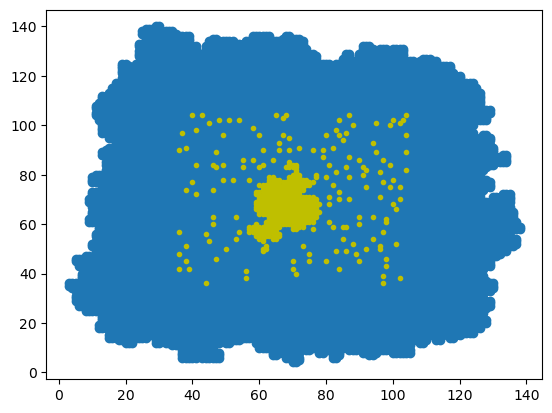

In [94]:
from matplotlib import pyplot as plt

g=[]
for i in range(rows+1):
    for j in range(columns+1):
        g.append([j,i])

#plt.plot([x[0] for x in g],[rows-x[1] for x in g], 'ro')
#plt.plot([x[0] for x in all],[rows-x[1] for x in all], '-o')
plt.plot([x[0] for x in all],[rows-x[1] for x in all], '-o')
plt.plot([x[0] for x in dots],[rows-x[1] for x in dots], 'y.')
#plt.plot([x[0] for x in checks],[rows-x[1] for x in checks], 'g.')
#print(all)